# Customer Spend Prediction - Using Polynomial Regression

## Problem Statement

Simple problem to illustrate polynomial regression modelling.

Objective is to illustrate certain key concepts for Polynomial regression by building a polynomial regression model that will predict customer spend based on the day of the week.

<font color="red">We shall not be focusing on accuracy or improving perfomance of the model</font>

### Workbench

#### Importing the required libraries

In [148]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Import Standard operations
import operator

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Import the warnings
import warnings

# Import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Import RMSE
from statsmodels.tools.eval_measures import rmse

# Imort Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# Import Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Import the Train Test Split capability from sk-learn
from sklearn.model_selection import train_test_split 

# Import the metrics
from sklearn.metrics import mean_squared_error, r2_score

# configuration settings
%matplotlib inline 
sns.set(color_codes=True)
warnings.filterwarnings('ignore') ## Surpress the warnings

#### Load the data into a dataframe

In [149]:
# load the data into a dataframe called supermarket_till_transactions_df
supermarket_till_transactions_df = pd.read_csv("../data/beginner/supermarket_till_transactions.csv")

In [150]:
# view the top five records
supermarket_till_transactions_df.head(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND   PROD_CODE  \
0     200607   20060413             5         20         1    103  PRD0900097   
1     200607   20060412             4         19         1     28  PRD0900353   
2     200607   20060413             5         20         3     84  PRD0900550   
3     200607   20060412             4         19         1    221  PRD0901647   
4     200607   20060413             5         20         1    334  PRD0902064   

  PROD_CODE_10 PROD_CODE_20 PROD_CODE_30  ... CUST_PRICE_SENSITIVITY  \
0      CL00001     DEP00001       G00001  ...                     LA   
1      CL00070     DEP00020       G00007  ...                     LA   
2      CL00167     DEP00055       G00016  ...                     LA   
3      CL00010     DEP00003       G00002  ...                     LA   
4      CL00073     DEP00021       G00007  ...                     LA   

  CUST_LIFESTAGE        BASKET_ID BASKET_SIZE  BASKET_PRICE_SENSITIVITY  \
0             YF  994100100532898           L                        LA   
1             YF  994100100532897           M                        MM   
2             YF  994100100532898           L                        LA   
3             YF  994100100532897           M                        MM   
4             YF  994100100532898           L                        LA   

  BASKET_TYPE BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
0      Top Up                   Fresh  STORE00001           LS          E02  
1  Small Shop                   Fresh  STORE00001           LS          E02  
2      Top Up                   Fresh  STORE00001           LS          E02  
3  Small Shop                   Fresh  STORE00001           LS          E02  
4      Top Up                   Fresh  STORE00001           LS          E02  

[5 rows x 22 columns]

In order to illustrate Polynomial Linear Regression we just need two variables which are:
1. SHOP_HOUR
2. SPEND

In [151]:
supermarket_till_transactions_df = supermarket_till_transactions_df[["SHOP_HOUR","SPEND"]]
supermarket_till_transactions_df.head(5)

SHOP_HOUR  SPEND
0         20    103
1         19     28
2         20     84
3         19    221
4         20    334

**Visualise the linear regression and compare to polynomial regression line**

In [152]:
x = supermarket_till_transactions_df.iloc[:,:-1].values
y = supermarket_till_transactions_df.iloc[:,-1].values

##### Display the Linear Regression Line

In [154]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x, y)
y_pred = linear_regression_model.predict(x)

linear_rmse = np.sqrt(mean_squared_error(y,y_pred))
linear_r2 = r2_score(y,y_pred)

# Visualizing the Linear Regression results
def display_linear_regression():
    plt.scatter(x, y, s=10)
    plt.plot(x, y_pred, color='r')
    plt.title('Linear Regression')
    plt.xlabel('SHOP Hour')
    plt.ylabel('SPEND')
    plt.show()
    return

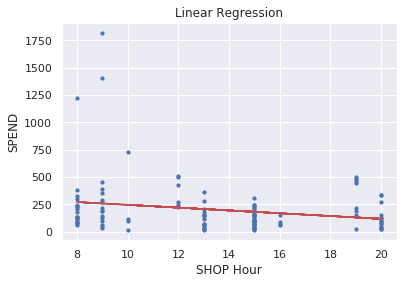

In [155]:
# Plot the Line regression line
display_linear_regression()

**Calculate the RMSE**

We can see that the straight line is unable to capture the patterns in the data. Which shows it is an example of under-fitting

To overcome the under-fitting, we need to increase the complexity of the model

In [156]:
print("The RMSE is : {} ".format(linear_rmse))
print("The R-Squared is : {} ".format(linear_r2))

The RMSE is : 242.29255053490624 
The R-Squared is : 0.04339450056928995 


To generate a higher order equation we can  add powers of the original features as new features and thus the linear model

![Transformin Linear Equation to Polinomial](../images/polynomial-regression-transforming-linear-model.PNG) 

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn and then train using Linear Regression

##### Display the Polynomial Regression Line

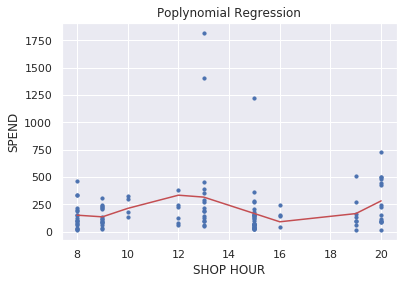

In [171]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(x_poly, y)
y_poly_pred = polynomial_regression_model.predict(x_poly)

polynomial_regression_rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
polynomial_regression_r2 = r2_score(y,y_poly_pred)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.title('Poplynomial Regression')
plt.xlabel('SHOP HOUR')
plt.ylabel('SPEND')
plt.show()


**Calculate the RMSE**

We can see that the line is tries to capture as many data points as possible and when we check the R-Squared value it should increase.

It is quite clear the new line tries to fit it better than the linear one.

In [172]:
print("The RMSE is : {} ".format(polynomial_regression_rmse))
print("The R-Squared is : {} ".format(polynomial_regression_r2))


The RMSE is : 236.81387071025406 
The R-Squared is : 0.08616660932667741 


**We can see that the RMSE has decreased and the R-Squared has increased as compared to the linear regression model**

#### Using statsmodel

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times SHOPHOUR $

Let's use Statsmodels to estimate these coefficients:

In [159]:
# Initialise and fit linear regression model using `statsmodels`
polynomial_features= PolynomialFeatures(degree=5)
xp = polynomial_features.fit_transform(x)
xp.shape

(119, 6)

In [160]:
stats_model = sm.OLS(y, xp).fit()
ypred = stats_model.predict(xp) 

ypred.shape

(119,)

Text(0, 0.5, 'SPEND')

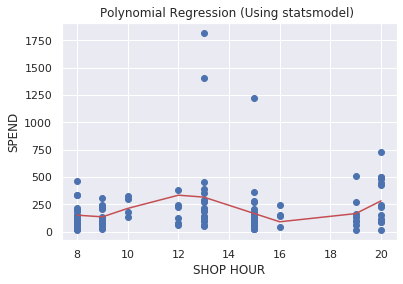

In [161]:
plt.scatter(x,y)
plt.plot(x, ypred, color='r')
plt.title('Polynomial Regression (Using statsmodel) ')
plt.xlabel('SHOP HOUR')
plt.ylabel('SPEND')

**Plotting the upper and lower confidence intervals**

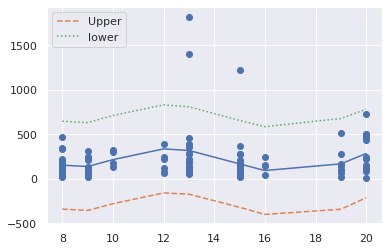

In [162]:
_, upper,lower = wls_prediction_std(stats_model)

plt.scatter(x,y)
plt.plot(x,ypred)
plt.plot(x,upper,'--',label="Upper") # confid. intrvl
plt.plot(x,lower,':',label="lower")
plt.legend(loc='upper left')

In [163]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.131
Date:                Tue, 07 Jan 2020   Prob (F-statistic):             0.0668
Time:                        10:01:28   Log-Likelihood:                -819.46
No. Observations:                 119   AIC:                             1651.
Df Residuals:                     113   BIC:                             1668.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.475e+04   2.34e+04      1.486      0.140   -1.16e+04    8.11e+04
x1         -1.371e+04   9240.838     -1.484      0.141    -3.2e+04    4597.328
x2          2086.6658   1424.972      1.464      0.146    -736.460    4909.792
x3          -152.3023    107.283     -1.420      0.158    -364.850      60.245
x4             5.3441      3.949      1.353      0.179      -2.480      13.168
x5            -0.0724      0.057     -1.271      0.206      -0.185       0.040
==============================================================================
Omnibus:                      124.892   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1873.898
Skew:                           3.711   Prob(JB):                         0.00
Kurtosis:                      20.968   Cond. No.                     1.57e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We no longer have to calculate alpha and beta ourselves as this method does it automatically for us! Calling model.params will show us the model’s parameters:

From the results above:
1. β0 = 366.8018 - This is the y intercept when x is zero
2. β2 = -12.306012 - This is the regression coefficient that measures a unit change in SPEND when SHOP_HOUR changes

##### R Squared

***The Coefficient of determination, R-Squared*** – This is used to measure how much of the variation in the outcome can be explained by the variation in the independent variables. R-Squared always increases as more predictors are added to the MLR model even though the predictors may not be related to the outcome variable.

R2 by itself can't thus be used to identify which predictors should be included in a model and which should be excluded. R2 can only be between 0 and 1, where 0 indicates that the outcome cannot be predicted by any of the independent variables and 1 indicates that the outcome can be predicted without error from the independent variables.

In [164]:
# print the R-squared value for the model
stats_model.rsquared

0.08616660932665154

**This means that <font color="red">8.62%</font> of the SPEND can be explained by SHOP_HOUR**

##### Adjusted R-Squared

When we add more predictor variables into the equation, R-Squared will always increase making R-Squared not accurate as the number of predictor variables increases.

Adjusted R-Squared, accounts for the increase of the predictor variables.

Because of the nature of the equation, the adjusted R-Squared should always be lower or equal to the R-Squared

In [165]:
# print the Adjusted R-squared value for the model
stats_model.rsquared_adj

0.04573150354464495

##### RMSE

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed

The smaller the value the better

In [166]:
# calc rmse
stats_model_rmse = rmse(y, ypred)
stats_model_rmse

236.81387071025745

##### Confidence in the model

A confidence interval gives an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data. 

A confidence interval is how much uncertainty there is with any particular statistic. Confidence intervals are often used with a margin of error. It tells you how confident you can be that the results reflect what you would expect to find if it were possible to study the entire population. 

In [167]:
# print the confidence intervals for the model coefficients
stats_model.conf_int()

array([[-1.15757701e+04,  8.10753000e+04],
       [-3.20182055e+04,  4.59732808e+03],
       [-7.36459968e+02,  4.90979154e+03],
       [-3.64849819e+02,  6.02453035e+01],
       [-2.47976789e+00,  1.31679714e+01],
       [-1.85172906e-01,  4.04464787e-02]])

##### Hypothesis Testing and P-Values

**p-values** tell you how statistically significant the variable is. Removing variables with high p-values can cause your accuracy/R squared to increase, and even the p-values of the other variables to increase as well — and that’s a good sign.

In [173]:
# print the p-values for the model coefficients
stats_model.pvalues

array([0.14003072, 0.14067799, 0.14587323, 0.15846917, 0.1786777 ,
       0.20639086])

**Notes**

To be prevent over-fitting, we can add more training samples so that the algorithm doesn't learn the noise in the system and can become more generalized.

To strike a blance between under-fitting and over-fitting you need to understand a statistical term called **Bias-Variance Trade-Off**